# Project X Report

## Team members: 

## Introduction

## Dataset

## Analysis technique

## Results


%%latex
\newpage

# Project X Code


## Imports

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import colorsys

## Function to graphically draw neural network

In [64]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)

## Loading wine data

In [65]:
wine_data = pd.read_csv("data/winequality-red.csv")
display(wine_data.head())
display(len(wine_data))

wine_data = wine_data.dropna()
display(len(wine_data))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1599

1599

## EDA

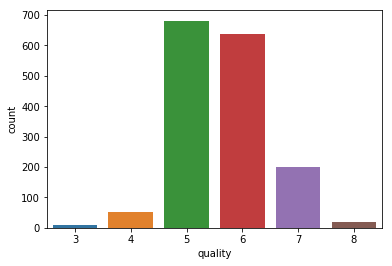

In [66]:
sns.countplot(x='quality', data=wine_data)

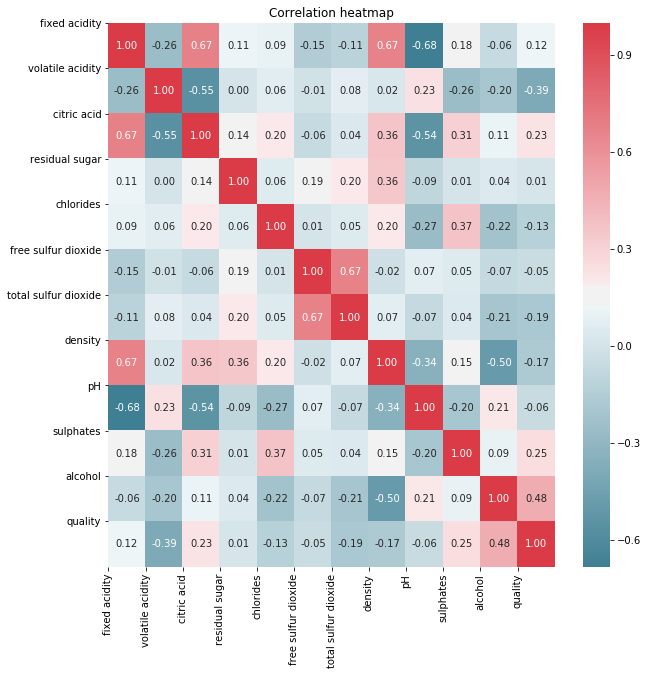

In [67]:
corr_df = wine_data
corr = corr_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Add title
plt.title('Correlation heatmap')
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

## Train Test split

In [68]:
X = wine_data.drop('quality',axis=1)
y = wine_data['quality']
display(X.head())
display(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Scaling the data

In [69]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Neural network 1

In [70]:
mlp1 = MLPClassifier(hidden_layer_sizes=(1, 2),max_iter=500)
mlp1.fit(X_train,y_train)
predictions = mlp1.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[  0   0   2   1   0   0]
 [  0   0   6  10   0   0]
 [  0   0 121  48   0   0]
 [  0   0  54 101   0   0]
 [  0   0   4  48   0   0]
 [  0   0   0   5   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.65      0.72      0.68       169
           6       0.47      0.65      0.55       155
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         5

   micro avg       0.56      0.56      0.56       400
   macro avg       0.19      0.23      0.20       400
weighted avg       0.46      0.56      0.50       400



C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, war

In [71]:
print(len(mlp.coefs_))
print(mlp.coefs_)

print(len(mlp.coefs_[0]))

print(len(mlp.intercepts_[0]))

3
[array([[ 0.3134041 ],
       [-0.43647921],
       [-0.27435854],
       [ 0.17243603],
       [-0.20227848],
       [ 0.0707587 ],
       [-0.24590966],
       [-0.09188039],
       [ 0.02184353],
       [ 0.3824937 ],
       [ 0.69458341]]), array([[ 0.69507383, -0.92695314]]), array([[-0.91499221, -0.3306496 ,  0.46284745,  1.04895037,  1.27271029,
         0.11904567],
       [ 0.52415145,  0.49240128,  1.56559942,  0.49129834, -1.19310795,
        -0.84806064]])]
11
1


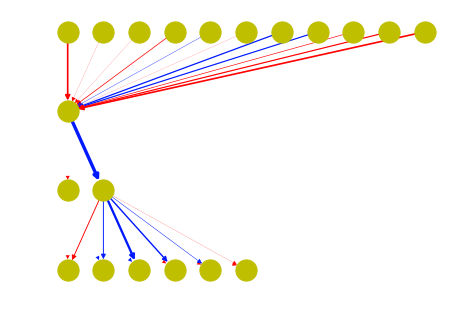

In [72]:
show_ann(mlp1)

## Neural Network 2

In [73]:
mlp2 = MLPClassifier(hidden_layer_sizes=(15, 15, 15),max_iter=10000)
mlp2.fit(X_train,y_train)
predictions = mlp2.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[  0   0   3   0   0   0]
 [  0   0  11   4   1   0]
 [  1   1 126  41   0   0]
 [  0   0  36 101  16   2]
 [  0   0   4  21  27   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.70      0.75      0.72       169
           6       0.59      0.65      0.62       155
           7       0.59      0.52      0.55        52
           8       0.00      0.00      0.00         5

   micro avg       0.64      0.64      0.64       400
   macro avg       0.31      0.32      0.32       400
weighted avg       0.60      0.64      0.62       400



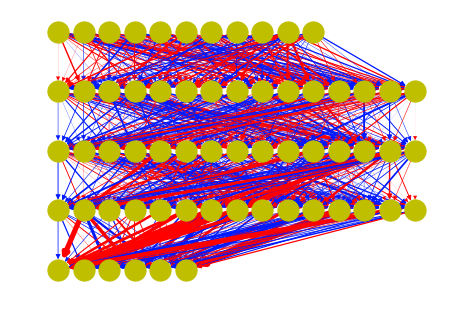

In [74]:
show_ann(mlp2)

## Neural Network 3

In [78]:
mlp3 = MLPClassifier(hidden_layer_sizes=(30, 30, 15),max_iter=10000)
mlp3.fit(X_train,y_train)
predictions = mlp3.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[  0   1   2   0   0   0]
 [  0   3   8   3   2   0]
 [  0   5 113  46   5   0]
 [  0   2  35  93  24   1]
 [  0   0   7  23  19   3]
 [  0   0   1   1   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.27      0.19      0.22        16
           5       0.68      0.67      0.67       169
           6       0.56      0.60      0.58       155
           7       0.36      0.37      0.36        52
           8       0.00      0.00      0.00         5

   micro avg       0.57      0.57      0.57       400
   macro avg       0.31      0.30      0.31       400
weighted avg       0.56      0.57      0.57       400



C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


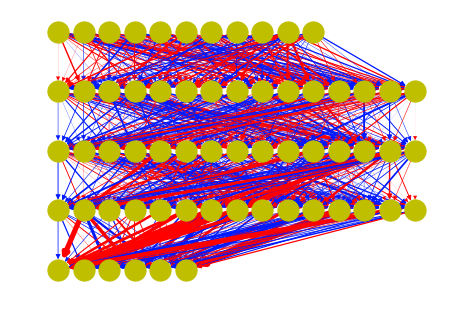

In [79]:
show_ann(mlp2)